# Graph Analysis

### Importing important Modules and loading stored data

In [3]:
import networkx as nx
from matplotlib import pyplot as plt

In [4]:
with open("userFollowingData.txt") as f:
    lines = f.read().splitlines() 

with open("userRepoTypeInfo.txt") as fg:
    user_repo_pasand = fg.read().splitlines() 

### Using networkx to make a directed graph of userFollowing data

In [5]:
user_following = nx.DiGraph()
for line in lines:
    for v in line[1:]:
        user_following.add_edge(line[0],v)

## Plot 1 
### Let's see relation of number of users and contributions of different languages 

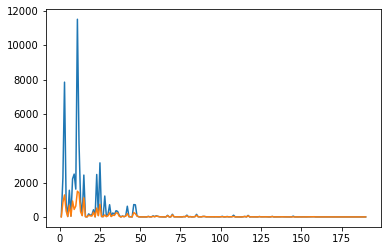

In [6]:
fig1, ax1 = plt.subplots()
num_contrib = [0 for i in range(193)]
num_user = [0 for i in range(193)]
lang_code = []
num_repo = []
user_repo_pasand = [l.split(' ')[1:] for l in user_repo_pasand]
for user in user_repo_pasand:
    for pair in user:
        x,y = map(int, pair.split('-'))
        lang_code.append(int(x))
        num_repo.append(int(y))
        num_contrib[x] += y
        num_user[x] += 1
ax1.plot([i for i in range(1,191)],num_contrib[1:191])
ax1.plot([i for i in range(1,191)],num_user[1:191])

Graph is not clear, there are a lot of languages with very less contribution, let's take a peek at only 30 languages 

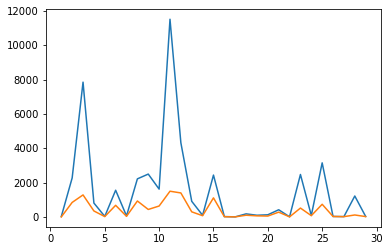

In [7]:
fig, ax2 = plt.subplots()
ax2.plot([i for i in range(1,30)],num_contrib[1:30])
ax2.plot([i for i in range(1,30)],num_user[1:30])

Observation:- This looks like More than 95% of contributions are in less than 5% languages, a nice analogy of distribution of money in a country.  

__Rich-gets-richer__ phenomenon is visible in this data, few languages have high contributions, so they get more contributions. 

## Plot 2 
### Average number of contributions vs number of contributions

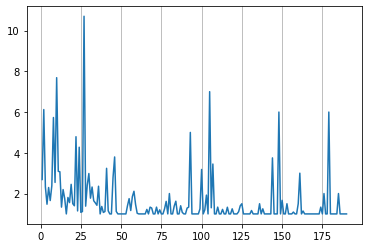

In [8]:
avg_contrib = [num_contrib[i]/num_user[i] for i in range(1,len(num_contrib))]
fig, ax3 = plt.subplots()
ax3.plot([i for i in range(1,191)],avg_contrib[1:191])
ax3.xaxis.grid(which='major')

No observation can be deduced from this graph, as all sort of languages have almost same avg_contribution :(

###Languages with avg contributions more than 5 

In [9]:
professionals_choice_languages = [i for i in range(1,len(num_contrib)) if avg_contrib[i-1] > 5]

In [10]:
professionals_choice_languages


[1, 3, 9, 11, 28, 106, 149, 180]

c++ looks deserving but ofther languages with code > 100 are not so popular, still their average is good. And contribution of Jupyter notebook is really overated by github, this repo is clear example.



## Plot 3
### The following graph

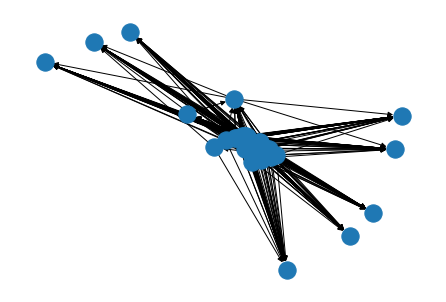

In [11]:
nx.draw(user_following)

___RICH gets RICHER___ again, it is clear that there are a few nodes which are sink, and are followed by a lot of people and don't follow anyone.

In [20]:
print("average degree = ", end = '')
print(nx.number_of_edges(user_following)/float(len(user_following)))

average degree = 46.28125


__Really?__ This was a shock for me too!